# The Neural Networks Playground Project

In [ ]:
import numpy as np
import pandas as pd
from NeuralNetwork import NeuralNetwork

In [ ]:
Binary2DecimalNN = NeuralNetwork(2, (3, 2), 4)

In [ ]:
neural_network_description = f"""This Neural Network has {Binary2DecimalNN.number_of_inputs} inputs, {Binary2DecimalNN.number_of_outputs} outputs, {Binary2DecimalNN.number_of_dense_layers} dense layers and {Binary2DecimalNN.neurons_per_layer} neurons per layer."""

print(neural_network_description)

In [ ]:
data = {"x_0": [0, 0, 0, 0, 1, 1, 1, 1],
        "x_1": [0, 0, 1, 1, 0, 0, 1, 1],
        "x_2": [0, 1, 0, 1, 0, 1, 0, 1],
        "y_0": [1, 0, 0, 0, 0, 0, 0, 0],
        "y_1": [0, 1, 0, 0, 0, 0, 0, 0],
        "y_2": [0, 0, 1, 0, 0, 0, 0, 0],
        "y_3": [0, 0, 0, 1, 0, 0, 0, 0],
        "y_4": [0, 0, 0, 0, 1, 0, 0, 0],
        "y_5": [0, 0, 0, 0, 0, 1, 0, 0],
        "y_6": [0, 0, 0, 0, 0, 0, 1, 0],
        "y_7": [0, 0, 0, 0, 0, 0, 0, 1]}

dataset = pd.DataFrame(data)

dataset

In [ ]:
x = dataset[["x_0", "x_1", "x_2"]]
y = dataset[[c for c in dataset.columns if c not in x.columns]]

x = x.to_numpy()
y = y.to_numpy()

In [ ]:
x

In [ ]:
y

In [ ]:
from NeuronLayer import NeuronLayer
from ActivationFunctions import Sigmoid
from CostFunctions import MeanSquaredError

In [ ]:
Layer = NeuronLayer(3, 8, Sigmoid)

In [ ]:
ActivationFunction = Sigmoid()
CostFunction = MeanSquaredError()

In [ ]:
y_estimate = Layer.feed_forward(x)

y_estimate

In [ ]:
CostFunction.cost(y, y_estimate)

In [ ]:
dC_dA = CostFunction.cost_derivative(y, y_estimate)

dA_dZ = ActivationFunction.activation_derivative(y_estimate)

dZ_dW = x

In [ ]:
dC_dA

In [ ]:
dA_dZ

In [ ]:
dZ_dW

In [ ]:
dC_dW = dC_dA @ dA_dZ @ dZ_dW

dC_dW

In [ ]:
alpha = 0.2

In [ ]:
new_weights = Layer.weights - alpha * dC_dW.T

new_weights

In [ ]:
Layer.weights = new_weights

In [ ]:
def back_propagate(x, y, y_estimate, Layer, alpha):
    
    C_dA = CostFunction.cost_derivative(y, y_estimate)

    dA_dZ = ActivationFunction.activation_derivative(y_estimate)

    dZ_dW = x
    
    dC_dW = dC_dA @ dA_dZ @ dZ_dW
    
    new_weights = Layer.weights - alpha * dC_dW.T
    
    Layer.weights = new_weights

In [ ]:
for i in range(2000):
    back_propagate(x, y, y_estimate, Layer, alpha)

In [ ]:
Layer.feed_forward(x)

In [ ]:
Layer.feed_forward(np.array([1, 1]))

In [ ]:
Layer.weights @ dA_dZ @ dC_dA

In [ ]:
C_dA = CostFunction.cost_derivative(y, y_estimate)

dA_dZ = ActivationFunction.activation_derivative(y_estimate)

dZ_dW = x
    
dC_dW = dC_dA * dA_dZ * dZ_dW
    
#new_weights = Layer.weights - alpha * dC_dW.T

In [ ]:
Layer.weights @ (dC_dA * dA_dZ)

In [ ]:
(dC_dA * dA_dZ) @ Layer.weights.T

In [ ]:
np.round(dC_dA, 2)

In [ ]:
np.round(dA_dZ, 2)

In [ ]:
np.round(dC_dA * dA_dZ, 2)

In [ ]:
Layer.weights @ (dA_dZ * dC_dA)

In [ ]:
Layer.weights

In [ ]:
a = np.random.randint(1, 5, size=(8, 5))
a

In [ ]:
b = np.random.randint(0, 10, size=(8, 5))
b

In [ ]:
np.mean(a, axis=0)

In [ ]:
a * b

In [ ]:
(dC_dA * dA_dZ) * x

In [ ]:
(1/2) * np.mean((y_estimate - y)**2, axis=0)

In [ ]:
np.array([[2, 3, 4], [1, -9, 7]])**2

In [ ]:
y.shape

In [ ]:
y_estimate.shape

In [ ]:
samples, outputs = y.shape

In [ ]:
loss = CostFunction.cost_derivative(y, y_estimate)
loss = loss.reshape((1, outputs))

loss

In [ ]:
((loss * dA_dZ) @ x).T

In [ ]:
np.array([2, 3, 4]) * np.array([[2, 3, 4], [1, -9, 7], [0, 0.5, 0.25]])

In [ ]:
Layer.weights.shape

# Let's Test This in a More Serious Way

In [ ]:
from NeuronLayer import NeuronLayer
from ActivationFunctions import Sigmoid
from CostFunctions import MeanSquaredError

## Set Things Up

In [ ]:
NUMBER_OF_INPUTS = 3
NUMBER_OF_OUTPUTS = 8
NEURONS_PER_LAYER = 5

In [ ]:
ActivationFunction = Sigmoid
CostFunction = MeanSquaredError

In [ ]:
FirstLayer = NeuronLayer(NUMBER_OF_INPUTS, NEURONS_PER_LAYER, ActivationFunction)
SecondLayer = NeuronLayer(NEURONS_PER_LAYER, NUMBER_OF_OUTPUTS, ActivationFunction)

## Start Computing

### 1. FeedForward

In [ ]:
FirstLayer.feed_forward(x)

In [ ]:
z0 = FirstLayer.output
a0 = FirstLayer.activation

In [ ]:
SecondLayer.feed_forward(a0)

In [ ]:
z1 = SecondLayer.output
a1 = SecondLayer.activation

### 2. BackPropagation

In [ ]:
dC_dA1 = CostFunction().cost(y, a1).reshape(1, NUMBER_OF_OUTPUTS)
dA1_dZ1 = ActivationFunction().activation_derivative(z1)
dZ1_dW1 = a0

In [ ]:
(dC_dA1 * dA1_dZ1) @ dZ1_dW1

In [ ]:
SecondLayer.weights.shape

In [ ]:
dZ1_dA0 = SecondLayer.weights
dA0_dZ0 = ActivationFunction().activation_derivative(z0)
dZ0_dW0 = x

In [ ]:
(dC_dA1 * dA1_dZ1) @ dZ1_dA0.T @ dA0_dZ0.T @ dZ0_dW0

In [ ]:
FirstLayer.weights.shape

# Now in a More Serious Way (Add One Layer and Split Dataset into Train and Test)

In [ ]:
from NeuronLayer import NeuronLayer
from ActivationFunctions import Sigmoid
from CostFunctions import MeanSquaredError

## Set Things Up

In [ ]:
NUMBER_OF_INPUTS = 3
NUMBER_OF_OUTPUTS = 8
NEURONS_PER_LAYER = 5

In [ ]:
ActivationFunction = Sigmoid
CostFunction = MeanSquaredError

In [ ]:
InputLayer = NeuronLayer(NUMBER_OF_INPUTS, NEURONS_PER_LAYER, ActivationFunction)
HiddenLayer = NeuronLayer(NEURONS_PER_LAYER, NEURONS_PER_LAYER, ActivationFunction)
OutputLayer = NeuronLayer(NEURONS_PER_LAYER, NUMBER_OF_OUTPUTS, ActivationFunction)

In [ ]:
print(f"""Neuron Architecture: {InputLayer.weights.shape} by {HiddenLayer.weights.shape} by {OutputLayer.weights.shape}.""")

## Train-Test Split

In [ ]:
TOTAL_SAMPLES = x.shape[0]
TRAINING_PERCENTAGE = 80
TRAIN_SAMPLES = int(np.floor(TRAINING_PERCENTAGE * TOTAL_SAMPLES / 100))
TEST_SAMPLES = int(TOTAL_SAMPLES - TRAIN_SAMPLES)

In [ ]:
print(f"""There are {TRAIN_SAMPLES} train samples and {TEST_SAMPLES} test samples.""")

In [ ]:
x_train = x[0:TRAIN_SAMPLES]
x_test = x[TRAIN_SAMPLES:]

y_train = y[0:TRAIN_SAMPLES]
y_test = y[TRAIN_SAMPLES:]

## Start Computing

### 1. FeedForward

#### Input Layer

In [ ]:
InputLayer.feed_forward(x_train)

In [ ]:
z0 = InputLayer.output
a0 = InputLayer.activation

#### Hidden Layer

In [ ]:
HiddenLayer.feed_forward(a0)

In [ ]:
z1 = HiddenLayer.output
a1 = HiddenLayer.activation

#### Output Layer

In [ ]:
OutputLayer.feed_forward(a1)

In [ ]:
z2 = OutputLayer.output
a2 = OutputLayer.activation

### 2. BackPropagation

#### Output Layer

In [ ]:
dC_dA2 = CostFunction().cost_derivative(y_train, a2).reshape(1, NUMBER_OF_OUTPUTS)
dA2_dZ2 = ActivationFunction().activation_derivative(z2)
dZ2_dW2 = a1

In [ ]:
delta_2 = dC_dA2 * dA2_dZ2

In [ ]:
dC_dW2 = a1.T @ delta_2

#### Hidden Layer

In [ ]:
dZ2_dA1 = OutputLayer.weights
dA1_dZ1 = ActivationFunction().activation_derivative(z1)
dZ1_dW1 = a0

In [ ]:
delta_1 = delta_2 @ OutputLayer.weights.T * dA1_dZ1

In [ ]:
dC_dW1 = a0.T @ delta_1

#### Input Layer

In [ ]:
dZ1_dA0 = HiddenLayer.weights
dA0_dZ0 = ActivationFunction().activation_derivative(z0)
dZ0_dW0 = x_train

In [ ]:
delta_0 = delta_1 @ HiddenLayer.weights.T * dA0_dZ0

In [ ]:
dC_dW0 = x_train.T @ delta_0

# I F***ING DID ITTTTTTTT

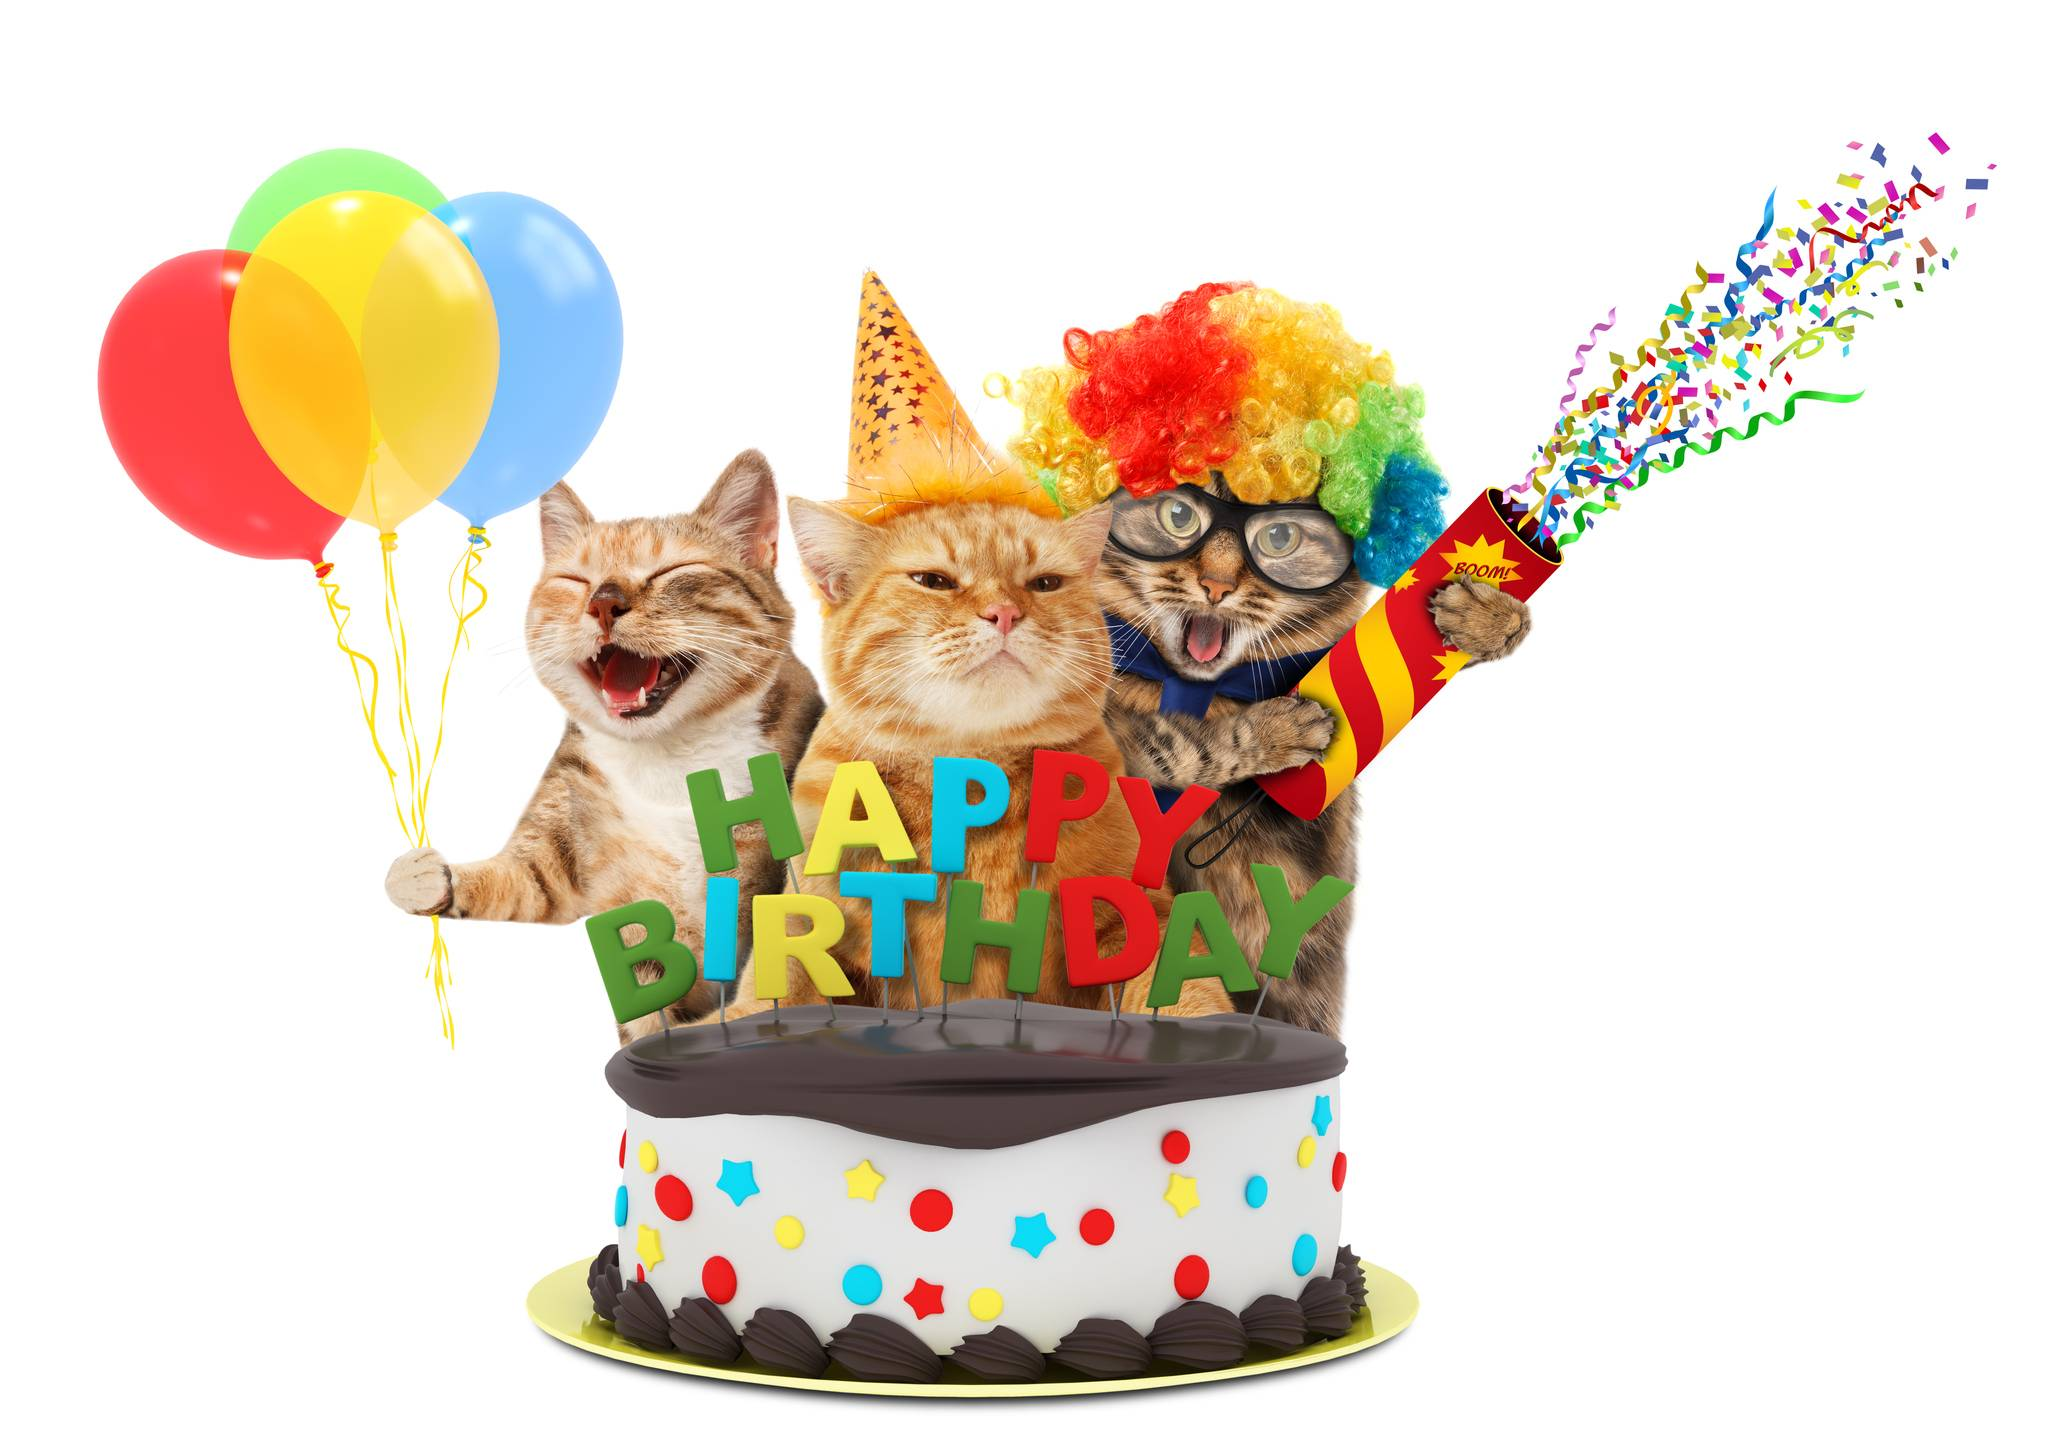

Now let's program this sh*t to be automated and Class-ready

In [ ]:
mylist = ["a", "b", "c", "d", "e", "f", "g"]

L = len(mylist)

print(f"Last layer: {mylist[-1]}")

for i in reversed(range(1, L-1)):
    print(f"{mylist[i]} / {mylist[i-1]} / {mylist[i+1]}")

In [ ]:
for i in range(10, 1, -1):
    print(i)

In [ ]:
for i in reversed(range(L)):
    print(i)

# Now Let's Try With the Updated Class

In [ ]:
from NeuralNetwork import NeuralNetwork
from ActivationFunctions import Sigmoid
from CostFunctions import MeanSquaredError

import numpy as np
import pandas as pd

## 1. Dataset

In [ ]:
data = {"x_0": [0, 0, 0, 0, 1, 1, 1, 1],
        "x_1": [0, 0, 1, 1, 0, 0, 1, 1],
        "x_2": [0, 1, 0, 1, 0, 1, 0, 1],
        "y_0": [1, 0, 0, 0, 0, 0, 0, 0],
        "y_1": [0, 1, 0, 0, 0, 0, 0, 0],
        "y_2": [0, 0, 1, 0, 0, 0, 0, 0],
        "y_3": [0, 0, 0, 1, 0, 0, 0, 0],
        "y_4": [0, 0, 0, 0, 1, 0, 0, 0],
        "y_5": [0, 0, 0, 0, 0, 1, 0, 0],
        "y_6": [0, 0, 0, 0, 0, 0, 1, 0],
        "y_7": [0, 0, 0, 0, 0, 0, 0, 1]}

dataset = pd.DataFrame(data)

dataset

In [ ]:
x = dataset[["x_0", "x_1", "x_2"]]
y = dataset[[c for c in dataset.columns if c not in x.columns]]

x = x.to_numpy()
y = y.to_numpy()

## 2. Train-Test Split

In [ ]:
TOTAL_SAMPLES = x.shape[0]
TRAINING_PERCENTAGE = 80
TRAIN_SAMPLES = int(np.floor(TRAINING_PERCENTAGE * TOTAL_SAMPLES / 100))
TEST_SAMPLES = int(TOTAL_SAMPLES - TRAIN_SAMPLES)

print(f"""There are {TRAIN_SAMPLES} train samples and {TEST_SAMPLES} test samples.""")

In [ ]:
x_train = x[0:TRAIN_SAMPLES]
x_test = x[TRAIN_SAMPLES:]

y_train = y[0:TRAIN_SAMPLES]
y_test = y[TRAIN_SAMPLES:]

## 3. Neural Network Setup

In [ ]:
NUMBER_OF_INPUTS = 2
NUMBER_OF_OUTPUTS = 1
NEURONS_PER_LAYER = 1
NUMBER_OF_DENSE_LAYERS = 8

In [ ]:
NN = NeuralNetwork(NUMBER_OF_INPUTS, (NEURONS_PER_LAYER, NUMBER_OF_DENSE_LAYERS), NUMBER_OF_OUTPUTS, MeanSquaredError)

In [ ]:
#Network Architecture

for layer in NN.layers:
    print(layer.weights.shape)

## 4. Feedforward

In [ ]:
#NN.feed_forward(X)

## 5. Backpropagation

In [ ]:
learning_rate = 0.05

In [ ]:
loss_function = MeanSquaredError()

In [ ]:
for i in range(10000):
    
    NN.feed_forward(X)
    NN.back_propagate(X, Y, learning_rate)
    loss = loss_function.cost(Y, NN.feed_forward(X))
    
for i, xx in enumerate(xmesh):
    for j, yy in enumerate(ymesh):
        y_mapped[i, j] = NN.feed_forward(np.array([xx, yy]))

print(f"Current Loss: {np.round(loss, 2)}")

plotter.pcolormesh(xmesh, ymesh, y_mapped, cmap="coolwarm")

yhat = NN.feed_forward(X).reshape(500)
plotter.scatter(X[yhat < 0.5, 0], X[yhat < 0.5, 1], c="skyblue")
plotter.scatter(X[yhat >= 0.5, 0], X[yhat >= 0.5, 1], c="salmon")
plotter.axis("equal")
plotter.show()

In [ ]:
#np.round(NN.feed_forward(X), 4)
#Y = Y.reshape(Y.shape[0], 1)

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plotter

In [ ]:
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

plotter.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plotter.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plotter.axis("equal")
plotter.show()

In [ ]:
resolution = 50
xmesh = np.linspace(-1.5, 1.5, resolution)
ymesh = np.linspace(-1.5, 1.5, resolution)
y_mapped = np.zeros((resolution, resolution))

for i, xx in enumerate(xmesh):
    for j, yy in enumerate(ymesh):
        y_mapped[i, j] = NN.feed_forward(np.array([xx, yy]))

plotter.pcolormesh(xmesh, ymesh, y_mapped, cmap="coolwarm")
yhat = NN.feed_forward(X).reshape(500)
plotter.scatter(X[yhat < 0.5, 0], X[yhat < 0.5, 1], c="skyblue")
plotter.scatter(X[yhat >= 0.5, 0], X[yhat >= 0.5, 1], c="salmon")
plotter.axis("equal")
plotter.show()

In [ ]:
yhat = NN.feed_forward(X).reshape(500)

In [ ]:
plotter.scatter(X[yhat < 0.5, 0], X[yhat < 0.5, 1], c="skyblue")
plotter.scatter(X[yhat >= 0.5, 0], X[yhat >= 0.5, 1], c="salmon")
plotter.axis("equal")
plotter.show()

# as;kdjakljsdljhasjdhkajshd|

In [ ]:
from NeuralNetwork import NeuralNetwork
from CostFunctions import MeanSquaredError
import numpy as np
import pandas as pd

In [ ]:
data = {"x_0": [0, 0, 0, 0, 1, 1, 1, 1],
        "x_1": [0, 0, 1, 1, 0, 0, 1, 1],
        "x_2": [0, 1, 0, 1, 0, 1, 0, 1],
        "y_0": [1, 0, 0, 0, 0, 0, 0, 0],
        "y_1": [0, 1, 0, 0, 0, 0, 0, 0],
        "y_2": [0, 0, 1, 0, 0, 0, 0, 0],
        "y_3": [0, 0, 0, 1, 0, 0, 0, 0],
        "y_4": [0, 0, 0, 0, 1, 0, 0, 0],
        "y_5": [0, 0, 0, 0, 0, 1, 0, 0],
        "y_6": [0, 0, 0, 0, 0, 0, 1, 0],
        "y_7": [0, 0, 0, 0, 0, 0, 0, 1]}

dataset = pd.DataFrame(data)

dataset

In [ ]:
x = dataset[["x_0", "x_1", "x_2"]]
y = dataset[[c for c in dataset.columns if c not in x.columns]]

x = x.to_numpy()
y = y.to_numpy()

## 2. Train-Test Split

In [ ]:
TOTAL_SAMPLES = x.shape[0]
TRAINING_PERCENTAGE = 80
TRAIN_SAMPLES = int(np.floor(TRAINING_PERCENTAGE * TOTAL_SAMPLES / 100))
TEST_SAMPLES = int(TOTAL_SAMPLES - TRAIN_SAMPLES)

print(f"""There are {TRAIN_SAMPLES} train samples and {TEST_SAMPLES} test samples.""")

In [ ]:
x_train = x[0:TRAIN_SAMPLES]
x_test = x[TRAIN_SAMPLES:]

y_train = y[0:TRAIN_SAMPLES]
y_test = y[TRAIN_SAMPLES:]

In [ ]:
I = 3
O = 8
hidden_topology = [4, 8]


NN = NeuralNetwork(I, hidden_topology, O, MeanSquaredError)

In [ ]:
for layer in NN.layers:
    print(layer.weights.shape)

In [ ]:
learning_rate = 0.1
loss_function = MeanSquaredError()

In [ ]:
for i in range(1):
    
    y = NN.feed_forward(x_train)
    NN.back_propagate(x_train, y_train, learning_rate)
    
    print(f"Current Loss: {np.round(loss_function.cost(y_train, y), 3)}")

In [ ]:
for i in range(6):
    print(np.round(NN.feed_forward(x_train[i]), 1))

In [ ]:
np.round(NN.feed_forward(x_test), 1)

In [ ]:
NN.number_of_hidden_layers

# Now Circlessssss

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plotter

In [ ]:
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

plotter.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plotter.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plotter.axis("equal")
plotter.show()

In [ ]:
I = 2
O = 1
hidden_topology = [4, 8]


NN = NeuralNetwork(I, hidden_topology, O, MeanSquaredError)

In [ ]:
learning_rate = 0.1
Y = Y.reshape(Y.shape[0], 1)

for i in range(1):
    
    y = NN.feed_forward(X)
    NN.back_propagate(X, Y, learning_rate)
    
    print(f"Current Loss: {np.round(loss_function.cost(Y, y), 3)}")

In [ ]:
resolution = 50
xmesh = np.linspace(-1.5, 1.5, resolution)
ymesh = np.linspace(-1.5, 1.5, resolution)
y_mapped = np.zeros((resolution, resolution))

for i, xx in enumerate(xmesh):
    for j, yy in enumerate(ymesh):
        y_mapped[i, j] = NN.feed_forward(np.array([xx, yy]))

plotter.pcolormesh(xmesh, ymesh, y_mapped, cmap="coolwarm")
yhat = NN.feed_forward(X).reshape(500)
plotter.scatter(X[yhat < 0.5, 0], X[yhat < 0.5, 1], c="skyblue")
plotter.scatter(X[yhat >= 0.5, 0], X[yhat >= 0.5, 1], c="salmon")
plotter.axis("equal")
plotter.show()

# Now Circlessssss

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plotter

from IPython.display import clear_output
from time import sleep

In [ ]:
Xdraw, Ydraw = make_circles(n_samples=500, factor=0.5, noise=0.05)

plotter.scatter(Xdraw[Ydraw == 0, 0], Xdraw[Ydraw == 0, 1], c="skyblue")
plotter.scatter(Xdraw[Ydraw == 1, 0], Xdraw[Ydraw == 1, 1], c="salmon")
plotter.axis("equal")
plotter.show()

In [ ]:
I = 2
O = 1
hidden_topology = [4, 8]


NN = NeuralNetwork(I, hidden_topology, O, MeanSquaredError)

In [ ]:
#Y = Y.reshape(Y.shape[0], 1)
resolution = 50
xmesh = np.linspace(-1.5, 1.5, resolution)
ymesh = np.linspace(-1.5, 1.5, resolution)
y_mapped = np.zeros((resolution, resolution))

In [ ]:
learning_rate = 0.1

for i in range(500):
    
    y = NN.feed_forward(X)
    NN.back_propagate(X, Y, learning_rate)
    
    print(f"Current Loss ({i}): {np.round(loss_function.cost(Y, y), 3)}")
    
    for i, xx in enumerate(xmesh):
        for j, yy in enumerate(ymesh):
            y_mapped[i, j] = NN.feed_forward(np.array([xx, yy]))

    plotter.pcolormesh(xmesh, ymesh, y_mapped, cmap="coolwarm")
    yhat = y.reshape(500)
    plotter.scatter(Xdraw[Ydraw == 0, 0], Xdraw[Ydraw == 0, 1], c="skyblue")
    plotter.scatter(Xdraw[Ydraw == 1, 0], Xdraw[Ydraw == 1, 1], c="salmon")
    #plotter.scatter(X[yhat < 0.5, 0], X[yhat < 0.5, 1], c="skyblue")
    #plotter.scatter(X[yhat >= 0.5, 0], X[yhat >= 0.5, 1], c="salmon")
    #plotter.axis("equal")
    plotter.show()
    
    clear_output(wait=True)
    sleep(0.08)

In [1]:
from NeuralNetwork import NeuralNetwork
from CostFunctions import MeanSquaredError

from sklearn.datasets import make_circles

In [2]:
I = 2
O = 1
hidden_topology = [4, 8]


NN = NeuralNetwork(I, hidden_topology, O, MeanSquaredError)

In [4]:
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)
Y = Y.reshape(Y.shape[0], 1)

In [42]:
NN.train(X, Y, alpha=0.05, epochs=1)

Epoch: 0 Current Loss: 0.0009220214883749273


In [44]:
NN.age

4010

In [45]:
s = 370
bs = 15

In [46]:
s / bs

24.666666666666668